### Identificação de Erros de Cadastro de Potência

Analisem a relação entre a potência cadastrada de cada usina e sua
geração efetiva ao longo da sua existência. Utilizem análises
comparativas e algoritmos de detecção de anomalias para identificar
usinas cuja geração não corresponde ao valor de potência registrado.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
DATASETS_FOLDER = './datasets/'

In [3]:
df_geracao = pd.read_csv(DATASETS_FOLDER + 'geracao', chunksize=1000000)
df_usina = pd.read_csv(DATASETS_FOLDER + '/usina')

df_unidade_consumidora = pd.read_csv('./datasets/unidade_consumidora')
df_cidade = pd.read_csv('./datasets/cidade')
df_endereco = pd.read_csv('./datasets/endereco')
df_estado = pd.read_csv('./datasets/estado')
df_id_ext = pd.read_csv('./datasets/id_ext')
df_usina_historico = pd.read_csv('./datasets/usina_historico')

In [14]:
# Validando valores do arquivo principal
df_usina.isna().sum()

id                            0
potencia                     27
unidade_consumidora_id        0
last_plant_history_id     13275
dtype: int64

In [21]:
df_usina.sort_values(by='last_plant_history_id', ascending=False)

,id,potencia,unidade_consumidora_id,last_plant_history_id
718703,142007,9.32,160189,6.308965e+09
786238,505390,160.58,581092,6.308965e+09
837634,939130,12.39,1080402,6.308965e+09
480593,522623,31.20,27430,6.308965e+09
267037,522601,70.00,234950,6.308965e+09
...,...,...,...,...
892900,753557,3.60,850437,NaN
892901,753558,2.40,850438,NaN
892902,753559,1.60,850439,NaN
892903,753560,3.20,850440,NaN


In [24]:
df_usina_historico.isna().sum()

id                            0
power                        27
performance              830032
plant_id                      0
start_date                    0
performance_type_enum    830029
dtype: int64

In [22]:
df_usina_historico.sort_values(by=['id'], ascending=False)

,id,power,performance,plant_id,start_date,performance_type_enum
469127,2671252,68.00,NaN,699154,2022-07-28 00:00:00,NaN
468379,2671203,68.00,NaN,699154,2022-07-28 00:00:00,NaN
469058,2671202,68.00,NaN,699154,2022-07-28 00:00:00,NaN
469913,2671152,8.88,NaN,1168929,2024-02-29 12:05:30,NaN
464582,2671102,0.00,NaN,1168927,2024-11-08 20:07:19.581,NaN
...,...,...,...,...,...,...
10018,38257,35.36,1376.47,1075,2019-06-23 03:00:00,0.0
27129,38254,538.14,1320.00,1790,2018-03-05 03:00:00,0.0
329046,38242,39.44,1398.68,150,2019-06-28 03:00:00,0.0
79263,38222,4.08,1320.00,3337,2019-10-07 03:00:00,0.0


In [12]:
df_usina_historico.sort_values(by=['id'], ascending=False)

,id,power,performance,plant_id,start_date,performance_type_enum
469127,2671252,68.00,NaN,699154,2022-07-28 00:00:00,NaN
468379,2671203,68.00,NaN,699154,2022-07-28 00:00:00,NaN
469058,2671202,68.00,NaN,699154,2022-07-28 00:00:00,NaN
469913,2671152,8.88,NaN,1168929,2024-02-29 12:05:30,NaN
464582,2671102,0.00,NaN,1168927,2024-11-08 20:07:19.581,NaN
...,...,...,...,...,...,...
10018,38257,35.36,1376.47,1075,2019-06-23 03:00:00,0.0
27129,38254,538.14,1320.00,1790,2018-03-05 03:00:00,0.0
329046,38242,39.44,1398.68,150,2019-06-28 03:00:00,0.0
79263,38222,4.08,1320.00,3337,2019-10-07 03:00:00,0.0


In [11]:
df_usina.dropna(inplace=True)

In [12]:
df_usina_amostra = df_usina.sample(n=100000, random_state=42)

In [13]:
# IDs usinas
ids_usinas_amostra = df_usina_amostra['id'].tolist()

geracao_filtrada = []

for chunk in df_geracao:
    # Filtrar apenas as usinas das 10 primeiras
    chunk_filtrado = chunk[chunk['id_usina'].isin(ids_usinas_amostra)]

    # Adicionar o chunk filtrado à lista
    geracao_filtrada.append(chunk_filtrado)

# Concatenar todos os chunks filtrados em um único DataFrame
df_geracao_filtrada = pd.concat(geracao_filtrada, ignore_index=True)

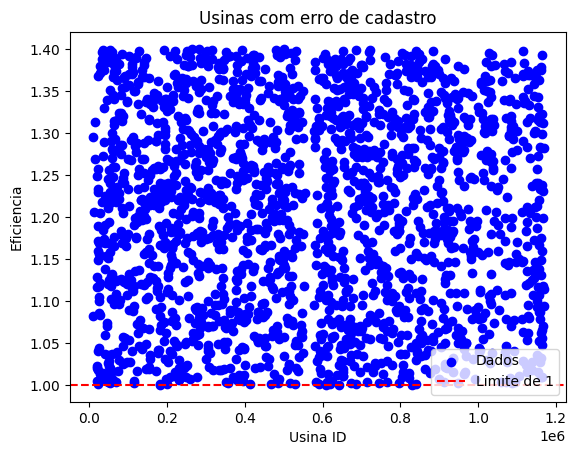

,id,potencia,unidade_consumidora_id,last_plant_history_id,id_usina,media_geracao_diaria,eficiencia
56987,8522,0.00,9111,6.279443e+09,8522,-12935.146606,-inf
3712,673901,107.20,752218,6.267324e+09,673901,-0.021645,-0.000202
74612,897912,4.55,1029034,6.296126e+09,897912,0.000000,0.000000
40760,1015192,14.58,1171753,6.254300e+09,1015192,0.000000,0.000000
40758,624214,13.20,690204,6.292469e+09,624214,0.000000,0.000000


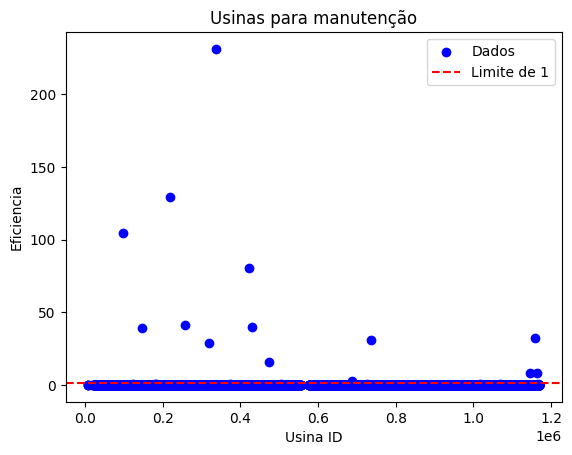

,id,potencia,unidade_consumidora_id,last_plant_history_id,id_usina,media_geracao_diaria,eficiencia
40,279456,8.55,314361,2.487467e+09,279456,0.0,0.0
43,1044644,103.70,1204724,6.305577e+09,1044644,0.0,0.0
50,200976,0.00,226252,6.306110e+09,200976,0.0,NaN
56,279472,15.00,314377,2.487468e+09,279472,0.0,0.0
65,279469,11.44,314374,2.487468e+09,279469,0.0,0.0


In [14]:
# DESAFIO 1

# Agrupar geração por usina
media_geracao = (
    df_geracao_filtrada.groupby('id_usina')['quantidade']
    .mean()
    .reset_index()
    .rename(columns={'quantidade': 'media_geracao_diaria'})
)

# Combinar dados
dados = pd.merge(df_usina, media_geracao, left_on='id', right_on='id_usina')
dados['eficiencia'] = dados['media_geracao_diaria'] / dados['potencia']

erros_cadastro = dados[dados['media_geracao_diaria'] > dados['potencia']]
erros_cadastro = erros_cadastro[erros_cadastro['eficiencia'] < 1.4]

# Identificar usinas com eficiência abaixo do limiar
usinas_para_manutencao = dados[dados['media_geracao_diaria'] <= 0.7]
usinas_para_manutencao.head()

# Criar o gráfico de linhas para os dados de x e y
plt.scatter(erros_cadastro['id'], erros_cadastro['eficiencia'], label='Dados', color='b')

# Adicionar a linha horizontal em y = 1
plt.axhline(y=1, color='r', linestyle='--', label='Limite de 1')

# Adicionar título e rótulos aos eixos
plt.title('Usinas com erro de cadastro')
plt.xlabel('Usina ID')
plt.ylabel('Eficiencia')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

display(dados.sort_values('eficiencia').head())

# Criar o gráfico de linhas para os dados de x e y
plt.scatter(usinas_para_manutencao['id'], usinas_para_manutencao['eficiencia'], label='Dados', color='b')

# Adicionar a linha horizontal em y = 1
plt.axhline(y=1, color='r', linestyle='--', label='Limite de 1')

# Adicionar título e rótulos aos eixos
plt.title('Usinas para manutenção')
plt.xlabel('Usina ID')
plt.ylabel('Eficiencia')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

display(usinas_para_manutencao.head())

In [18]:
erros_cadastro.count()

id                        2024
potencia                  2024
unidade_consumidora_id    2024
last_plant_history_id     2024
id_usina                  2024
media_geracao_diaria      2024
eficiencia                2024
dtype: int64